In [ ]:
!pip install pysam
!pip install numpy
import pysam
vcf = pysam.VariantFile('/content/drive/MyDrive/experiment_3.vcf')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 46.0 MB/s eta 0:00:00


In [ ]:
#ukupno subjekata
print("Ukupno subjekata koji su ucestvovali:" + str(len(list(vcf.header.samples))))
#zdravi i bolesni subjekti
zdravi = []
bolesni = []
for x in vcf.header.samples:
  if("case" in x):
    bolesni.append(x)
  else:
    zdravi.append(x)
print("Zdravih subjekata ima:" + str(len(zdravi)))
print("Bolesnih subjekata ima:" + str(len(bolesni)))

In [ ]:
mutacije = list(vcf.fetch())

In [ ]:
#koliko mutacija je posmatrano u populaciji
print("U populaciji je posmatrano " + str(len(mutacije)) + " mutacija")

U populaciji je posmatrano 1340823 mutacija


In [ ]:
#Mutacije po hromozomu
mutacijePoHromozomu = dict()
for variant in mutacije:
    mutacijePoHromozomu[variant.chrom] = 0

for variant in mutacije:
    mutacijePoHromozomu[variant.chrom] += 1

print(mutacijePoHromozomu)


{'1': 102842, '2': 114870, '3': 92888, '4': 85336, '5': 86532, '6': 95476, '7': 74002, '8': 76756, '9': 65374, '10': 72903, '11': 67554, '12': 66884, '13': 56428, '14': 44790, '15': 38680, '16': 37876, '17': 30975, '18': 41882, '19': 19172, '20': 33382, '21': 18402, '22': 17819}


In [ ]:
from scipy.stats import chisquare
def hiKvadrat(m):
  RefZdravi = 0
  RefBolesni = 0
  AltZdravi = 0
  AltBolesni = 0
  for z in zdravi:
    data = m.samples[z]['GT']
    if(data[0] == 0 and data[1] == 0):
      RefZdravi+=1
    elif(data[0] > 0 and data[1] > 0 and data[0] == data[1]):
      AltZdravi+=2


  for b in bolesni:
    data = m.samples[b]['GT']
    if(data[0] == 0 and data[1] == 0):
      RefBolesni+=1
    elif(data[0] > 0 and data[1] > 0 and data[0] == data[1]):
      AltBolesni+=2

  ukupnoSubjekata = RefZdravi + RefBolesni + AltZdravi + AltBolesni
  ocekivanaVrednost = [(RefBolesni + AltBolesni)*(RefBolesni  + RefZdravi)/ukupnoSubjekata,
                       (RefZdravi + AltZdravi)*(RefBolesni + RefZdravi)/ukupnoSubjekata,
                       (RefBolesni + AltBolesni)*(AltBolesni  + AltZdravi)/ukupnoSubjekata,
                       (RefZdravi + AltZdravi)*(AltBolesni + AltZdravi)/ukupnoSubjekata]
  return chisquare([RefBolesni,RefZdravi,AltBolesni,AltZdravi],ocekivanaVrednost).pvalue



In [ ]:
from matplotlib.legend_handler import HandlerLineCollection
import matplotlib.pyplot as plt
import numpy as np
chromosomes = []
p_values = []
# Prikupljanje podataka
for variant in mutacije:
  chromosomes.append((variant.chrom,variant.pos,hiKvadrat(variant)))


print(len(chromosomes))




/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:8064: RuntimeWarning: invalid value encountered in divide
  terms = (f_obs_float - f_exp)**2 / f_exp


1340823


In [ ]:
for gen in chromosomes:
  if gen[2] < 0.49/len(chromosomes):
    print('Hromozom ' + str(gen[0]) + 'gen ' + str(gen[1]))

Hromozom 1gen 43415346
Hromozom 1gen 43427218


In [ ]:
def bolesniProcenat(m):
  RefBolesni = 0
  AltBolesni = 0
  HetBolesni = 0
  ukupno = len(bolesni)
  for b in bolesni:
    data = m.samples[b]['GT']
    if(data[0] == 0 and data[1] == 0):
      RefBolesni+=1
    elif(data[0] > 0 and data[1] > 0 and data[0] == data[1]):
      AltBolesni+=1
    elif(data[0] != data[1]):
      HetBolesni+=1

  homoRefBolesni = RefBolesni/ukupno
  homoAltBolesni = AltBolesni/ukupno
  heteroBolesni = HetBolesni/ukupno
  mafBolesni = min(RefBolesni,AltBolesni)/ukupno


  return homoRefBolesni,homoAltBolesni,heteroBolesni,mafBolesni

In [ ]:
def zdraviProcenat(m):
  RefZdravi = 0
  AltZdravi = 0
  HetZdravi = 0
  ukupno = len(zdravi)
  for b in zdravi:
    data = m.samples[b]['GT']
    if(data[0] == 0 and data[1] == 0):
      RefZdravi+=1
    elif(data[0] > 0 and data[1] > 0 and data[0] == data[1]):
      AltZdravi+=1
    elif(data[0] != data[1]):
      HetZdravi+=1

  homoRefZdravi = RefZdravi/ukupno
  homoAltZdravi = AltZdravi/ukupno
  heteroZdravi = HetZdravi/ukupno
  mafZdravi = min(RefZdravi,AltZdravi)/ukupno

  return homoRefZdravi,homoAltZdravi,heteroZdravi,mafZdravi

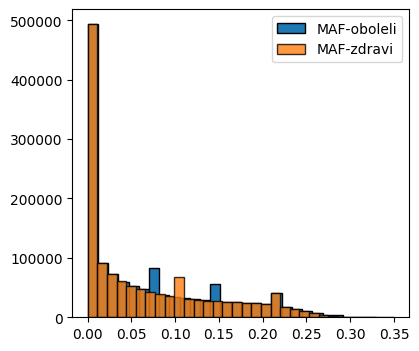

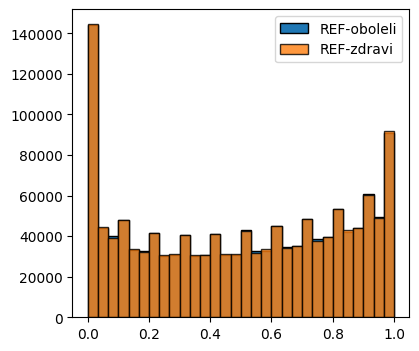

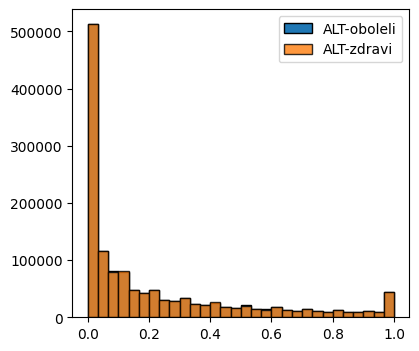

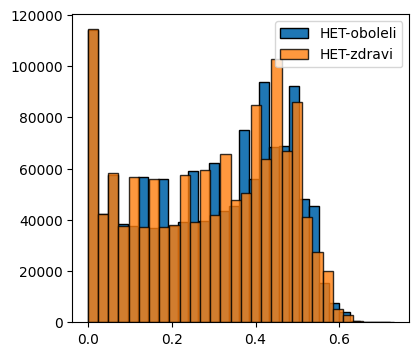

In [ ]:
import matplotlib.pyplot as plt
pct_RefBolesniNiz = []
pct_AltBolesniNiz = []
pct_htBolesniNiz = []
mafBolesniNiz = []
pct_RefZdraviNiz = []
pct_AltZdraviNiz = []
pct_htZdraviNiz = []
mafZdraviNiz = []

for mutacija in mutacije:
    pct_RefBolesni,pct_AltBolesni,pct_htBolesni,mafBolesni = bolesniProcenat(mutacija)
    pct_RefZdravi,pct_AltZdravi,pct_htZdravi,mafZdravi = zdraviProcenat(mutacija)
    pct_RefBolesniNiz.append(pct_RefBolesni)
    pct_AltBolesniNiz.append(pct_AltBolesni)
    pct_htBolesniNiz.append(pct_htBolesni)
    mafBolesniNiz.append(mafBolesni)
    pct_RefZdraviNiz.append(pct_RefZdravi)
    pct_AltZdraviNiz.append(pct_AltZdravi)
    pct_htZdraviNiz.append(pct_htZdravi)
    mafZdraviNiz.append(mafZdravi)


plt.figure(figsize = (20, 4))
plt.subplot(1,4,1)
plt.hist(mafBolesniNiz, bins= 30, edgecolor='black', label = 'MAF-oboleli')
plt.hist(mafZdraviNiz, bins= 30, edgecolor='black', alpha=0.8, label = 'MAF-zdravi')
plt.legend()
plt.show()


plt.figure(figsize = (20, 4))
plt.subplot(1,4,2)
plt.hist(pct_RefBolesniNiz, bins= 30, edgecolor='black', label = 'REF-oboleli')
plt.hist(pct_RefZdraviNiz, bins= 30, edgecolor='black', alpha=0.8, label = 'REF-zdravi')
plt.legend()
plt.show()

plt.figure(figsize = (20, 4))
plt.subplot(1,4,3)
plt.hist(pct_AltBolesniNiz, bins= 30, edgecolor='black', label = 'ALT-oboleli')
plt.hist(pct_AltZdraviNiz, bins= 30, edgecolor='black', alpha=0.8, label = 'ALT-zdravi')
plt.legend()
plt.show()

plt.figure(figsize = (20, 4))
plt.subplot(1,4,4)
plt.hist(pct_htBolesniNiz, bins= 30, edgecolor='black', label = 'HET-oboleli')
plt.hist(pct_htZdraviNiz, bins= 30, edgecolor='black', alpha=0.8, label = 'HET-zdravi')
plt.legend()
plt.show()





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


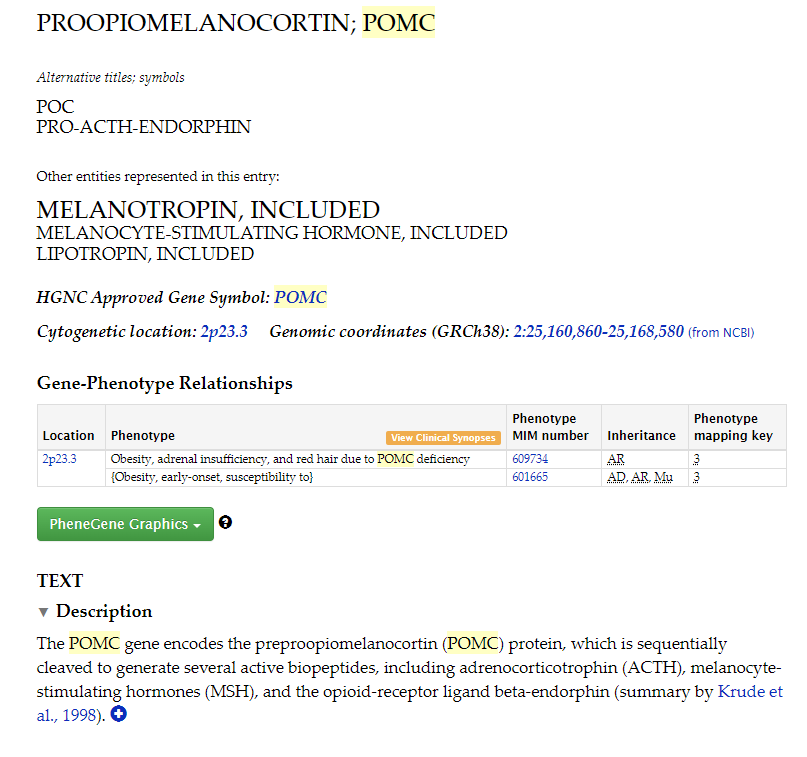